In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style("whitegrid")
from scipy.io import loadmat

# Part 1.1) Loading and visualizing the data

In [3]:
data = loadmat('ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X,y = data['X'], data['y']

In [5]:
X.shape

(51, 2)

In [6]:
y.shape

(51, 1)

In [9]:
X_bias = np.hstack((np.ones((X.shape[0],1)),X))

In [11]:
X_bias[:5]

array([[1.    , 1.9643, 4.5957],
       [1.    , 2.2753, 3.8589],
       [1.    , 2.9781, 4.5651],
       [1.    , 2.932 , 3.5519],
       [1.    , 3.5772, 2.856 ]])

In [154]:
def plotData(X,y):
    pos = y==1
    neg = y==0
    
    plt.scatter(X[pos[:,0],0],X[pos[:,0],1],marker='+',s=30,c = 'darkblue', label = "Positive")
    plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker='o',s=30,c = 'pink',label = "Negative")
    
    plt.xlim(X[:,0].min(), X[:,0].max())
    plt.ylim(X[:,1].min(), X[:,1].max())
    
    plt.legend(loc = 'upper right', frameon = True)
    

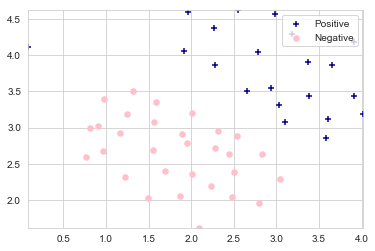

In [155]:
plotData(X,y)

# Part 1.2 ) Train Linear SVM

In [53]:
#function to train linear SVM and plot decision boundary
C=1

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [118]:
def makemeshgrid(X,y,h=0.02):
    x_min, x_max = X.min()-1, X.max() + 1
    y_min, y_max = y.min()-1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max,h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(clf, X, y):
    xx, yy = makegrid(X,y)
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #this puts the meshgrid into a form that SVM predict expects 
    #see documentation here https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.predict
    z = z.reshape(xx.shape)
    plt.contour(xx,yy,z,1,colors = 'b')
    return

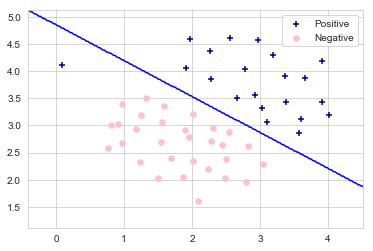

In [119]:
plotData(X,y)
plot_contours(classifier,X[:,0],X[:,1])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


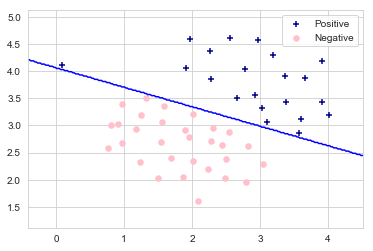

In [121]:
#Let's test different value of C
C=100
classifier2 = SVC(C = 100,kernel = 'linear')
classifier2.fit(X,y)
plotData(X,y)
plot_contours(classifier2,X[:,0],X[:,1])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


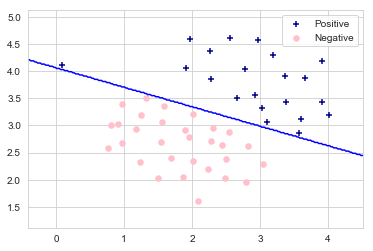

In [123]:
#Let's test different value of C
C=1000
classifier3 = SVC(C = 100,kernel = 'linear')
classifier3.fit(X,y)
plotData(X,y)
plot_contours(classifier3,X[:,0],X[:,1])

# Part 1.3) Implement Gaussian Kernel

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


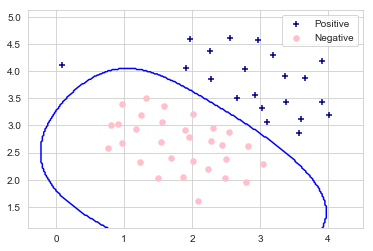

In [131]:
#This can be done in SVM itself so let's skip the step
C=1000
classifier4 = SVC(gamma = 'auto',kernel = 'rbf')
classifier4.fit(X,y)
plotData(X,y)
plot_contours(classifier4,X[:,0],X[:,1])

# Part 1.4) Visualizing Dataset 2

In [132]:
data2 = loadmat('ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [133]:
X_data2, y_data2 = data2['X'], data2['y']

In [134]:
X_data2

(863, 2)

In [136]:
y_data2.shape

(863, 1)

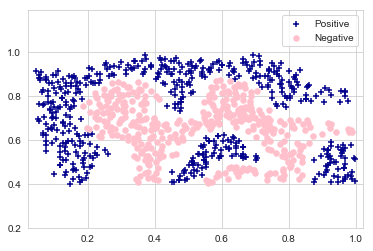

In [141]:
plotData(X_data2, y_data2)

# Part 1.5) Implementing RBF Kernel

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


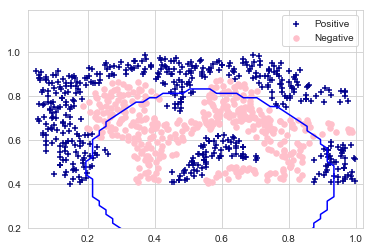

In [150]:
C=1000
classifier5 = SVC(gamma = 'auto',kernel = 'rbf')
classifier5.fit(X_data2,y_data2)
plotData(X_data2,y_data2)
plot_contours(classifier5,X_data2[:,0],X_data2[:,1])

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


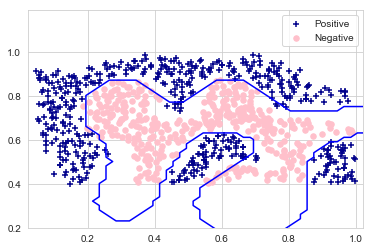

In [151]:

classifier5 = SVC(gamma = 30,kernel = 'rbf')
classifier5.fit(X_data2,y_data2)
plotData(X_data2,y_data2)
plot_contours(classifier5,X_data2[:,0],X_data2[:,1])

# Part 1.6) Visualizing Dataset3 

In [162]:
data3 = loadmat('ex6data3.mat')
X_data3, y_data3 = data3['X'], data3['y']
X_data3_val, y_data3_val = data3['Xval'], data3['yval']
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

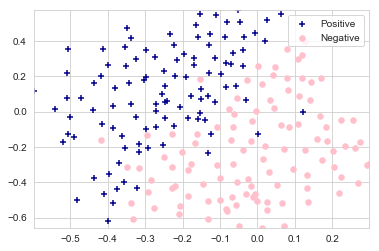

In [156]:
plotData(X_data3,y_data3)

In [166]:
def bestparams(X,y,Xval,yval, vals):
    C=0
    gamma = 0
    best_C = 0
    best_gamma = 0
    best_score = 0
    for i in vals:
        C = i
        for j in vals:
            gamma = i/j
            classifier = SVC(C=C, gamma = gamma)
            classifier.fit(X,y)
            score = classifier.score(Xval,yval)
            if score > best_score:
                best_C = C
                best_gamma = gamma
                best_score = score
    return best_C, best_gamma
    

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

1 100.0


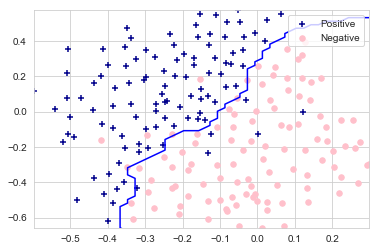

In [169]:
vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
best_C,best_gamma = bestparams(X_data3, y_data3, X_data3_val, y_data3_val,vals)
print(best_C, best_gamma)
classifier = SVC(C = best_C, gamma = best_gamma)
classifier.fit(X_data3,y_data3)
plotData(X_data3,y_data3)
plot_contours(classifier,X_data3[:,0],X_data3[:,1])

# Part 2.1) Email preprocessing

In [257]:
#Read file contents
import re
from nltk.stem import PorterStemmer

email_sample  = open('emailSample1.txt','r').read()
email_sample
vocab = open('vocab.txt','r').read()
vocab

'1\taa\n2\tab\n3\tabil\n4\tabl\n5\tabout\n6\tabov\n7\tabsolut\n8\tabus\n9\tac\n10\taccept\n11\taccess\n12\taccord\n13\taccount\n14\tachiev\n15\tacquir\n16\tacross\n17\tact\n18\taction\n19\tactiv\n20\tactual\n21\tad\n22\tadam\n23\tadd\n24\taddit\n25\taddress\n26\tadministr\n27\tadult\n28\tadvanc\n29\tadvantag\n30\tadvertis\n31\tadvic\n32\tadvis\n33\tae\n34\taf\n35\taffect\n36\taffili\n37\tafford\n38\tafrica\n39\tafter\n40\tag\n41\tagain\n42\tagainst\n43\tagenc\n44\tagent\n45\tago\n46\tagre\n47\tagreement\n48\taid\n49\tair\n50\tal\n51\talb\n52\talign\n53\tall\n54\tallow\n55\talmost\n56\talon\n57\talong\n58\talreadi\n59\talsa\n60\talso\n61\taltern\n62\talthough\n63\talwai\n64\tam\n65\tamaz\n66\tamerica\n67\tamerican\n68\tamong\n69\tamount\n70\tamp\n71\tan\n72\tanalysi\n73\tanalyst\n74\tand\n75\tani\n76\tanim\n77\tannounc\n78\tannual\n79\tannuiti\n80\tanoth\n81\tanswer\n82\tanti\n83\tanumb\n84\tanybodi\n85\tanymor\n86\tanyon\n87\tanyth\n88\tanywai\n89\tanywher\n90\taol\n91\tap\n92\tapolog\

In [240]:
vocab_new = vocab.split('\n')[:-1]

In [241]:
type(vocab_new)

list

In [242]:
vocab_new[:5]

['1\taa', '2\tab', '3\tabil', '4\tabl', '5\tabout']

In [243]:
#Let's create a dictionary of the vocab. The dictionary will be keyed by the word and provide the index for the word
vocab_dict = {}
for elements in vocab_new:
    value,key = elements.split("\t")
    vocab_dict[key]=value
    

In [244]:
vocab_dict['zip']

'1899'

In [287]:
def process_email(email_contents, vocab_d):
    email_processed = email_contents
    
    #lower case
    email_processed = email_processed.lower()
    

    # #handle numbers
    email_processed = re.sub("[0-9]+","number", email_processed)

    # #handle urls
    email_processed = re.sub("(https|http)?://[^\s]*","httpaddress", email_processed)

    # #handle email address
    email_processed = re.sub("[^\s]+@[^\s]+","emailaddr",email_processed)

    # #handle dollar sign
    email_processed = re.sub("[$]+","dollar", email_processed)

    #strip special characters
    special_char = ["<","[","^",">","+","?","!","'",".",",",":"]
    for sc in special_char:
        email_processed = email_processed.replace(sc," ")
    email_processed = email_processed.replace("\n","")
    email_processed = email_processed.replace("  "," ")

    #stem the word
    ps = PorterStemmer()
    email_processed = " ".join([ps.stem(token) for token in email_processed.split(" ")])
    
    #let's get a vocab vector for the email
    word_index=[]
    for word in email_sample_processed.split():
        if len(word)>1 and word in vocab_dict:
            word_index.append(int(vocab_dict[word]))
            
    return word_index


In [288]:
def feature_vector(word_indices, vocab_dict):
    features = np.zeros((len(vocab_dict),1))
    for i in word_indices:
        features[i] = 1
    return features

In [298]:
word_indices = process_email(email_sample,vocab_dict)
features = feature_vector(word_indices, vocab_dict)
print("Length of feature vector: ",len(features))
print("Number of non-zero entries: ",np.sum(features))

Length of feature vector:  1899
Number of non-zero entries:  44.0


In [291]:
features = feature_vector(word_indices, vocab_dict)

In [297]:
np.sum(features)/len(features)

0.02317008952080042

In [300]:
spam_train = loadmat('spamTrain.mat')
spam_train.keys()
X_spam, y_spam= spam_train['X'], spam_train['y']

In [309]:
spam_train_classifier = SVC(C =0.1, kernel='linear')
spam_train_classifier.fit(X_spam, y_spam.ravel())
print(spam_train_classifier.score(X_spam, y_spam.ravel())*100,'%')

99.825 %


In [314]:
spam_test = loadmat('spamTest.mat')
spam_test.keys()
X_spam_test, y_spam_test= spam_test['Xtest'], spam_test['ytest']


In [315]:
print(spam_train_classifier.score(X_spam_test, y_spam_test.ravel())*100,'%')

98.9 %


In [318]:
weights = spam_train_classifier.coef_

In [323]:
weights = weights.reshape(1899,1)
weights.shape

(1899, 1)

In [329]:
weights_col = np.hstack((np.arange(1,1900).reshape(1899,1),weights))

In [354]:
#now that we have the weights column we want to find out which words got the highest weight

#we can order weights by the second column, pick the first 10, get the keys from vocab_dict for the values in first column
import pandas as pd

df = pd.DataFrame(weights_col)
df.sort_values(by=1, ascending=False, inplace = True)
predictors = []
idx = []
for i in df[0][:15]:
    for keys,values in vocab_dict.items():
        if str(int(i)) == values:
            predictors.append(keys)
            idx.append(int(values))
print("Top predictors of spam:")
for _ in range(15):
    print(predictors[_],"\t\t",round(df[1][idx[_]-1],6))

Top predictors of spam:
our 		 0.500614
click 		 0.465916
remov 		 0.422869
guarante 		 0.383622
visit 		 0.36771
basenumb 		 0.345064
dollar 		 0.323632
will 		 0.269724
price 		 0.267298
pleas 		 0.261169
most 		 0.257298
nbsp 		 0.253941
lo 		 0.253467
ga 		 0.248297
hour 		 0.246404
